In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA, NMF

In [2]:
!wget https://github.com/WiraDKP/unsupervised_learning/raw/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip

--2023-10-21 15:12:19--  https://github.com/WiraDKP/unsupervised_learning/raw/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WiraDKP/unsupervised_learning/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip [following]
--2023-10-21 15:12:19--  https://raw.githubusercontent.com/WiraDKP/unsupervised_learning/master/18%20-%20Unsupervised%20Learning/02%20-%20Dimensionality%20Reduction/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24864134 (24M) [application/zip]
Saving to

In [3]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/lfw_people.csv     
  inflating: data/small_fmnist.csv   
  inflating: data/breast_cancer.csv  
  inflating: data/kompas.csv         
  inflating: __MACOSX/data/._kompas.csv  
   creating: data/sample_faces/
  inflating: data/sample_faces/.DS_Store  
   creating: __MACOSX/data/sample_faces/
  inflating: __MACOSX/data/sample_faces/._.DS_Store  
  inflating: data/sample_faces/hatta.png  
  inflating: data/sample_faces/soekarno2.png  
  inflating: data/sample_faces/soekarno1.png  


In [4]:
df = pd.read_csv("/content/data/lfw_people.csv")
df.head()

,pixel_1-1,pixel_1-2,pixel_1-3,pixel_1-4,pixel_1-5,pixel_1-6,pixel_1-7,pixel_1-8,pixel_1-9,pixel_1-10,...,pixel_87-57,pixel_87-58,pixel_87-59,pixel_87-60,pixel_87-61,pixel_87-62,pixel_87-63,pixel_87-64,pixel_87-65,name
0,57,60,78,120,156,178,195,210,221,222,...,41,17,15,20,19,18,17,16,22,Winona Ryder
1,66,80,88,68,63,96,115,127,139,148,...,25,18,11,8,8,8,8,8,9,Jean Chretien
2,18,14,15,13,14,23,55,92,125,154,...,253,251,240,172,47,20,22,22,25,Carlos Menem
3,76,113,172,201,199,190,177,167,167,171,...,82,115,131,137,136,138,140,143,143,Ariel Sharon
4,79,70,70,81,99,126,144,156,164,168,...,88,91,90,89,85,83,80,74,64,Alvaro Uribe


In [5]:
X = df.drop(columns='name').values
y = df.name.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2418, 5655), (605, 5655), (2418,), (605,))

<h3> Visualize Data

(-0.5, 64.5, 86.5, -0.5)

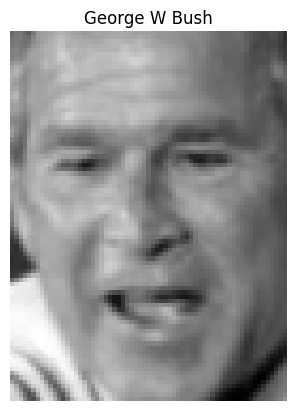

In [12]:
idx = 5
plt.imshow(X_train[idx].reshape(87, 65), cmap='gray')
plt.title(y_train[idx])
plt.axis('off')

In [14]:
pca = PCA().fit(X_train)

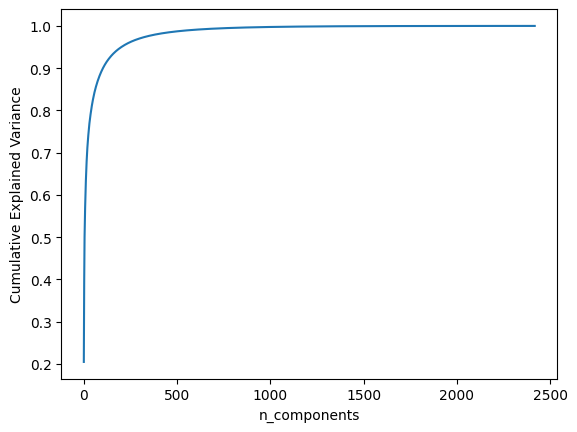

In [15]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance');

<h3> Feature EXtraction using Dim Reduction

In [16]:
pca = PCA(n_components=250, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
print(X_train.shape) # hidden layer
print(X_train_pca.shape) # weight / code
print(pca.components_.shape) # feature

(2418, 5655)
(2418, 250)
(250, 5655)


<h3> Try Visualize Importance Components of PCA

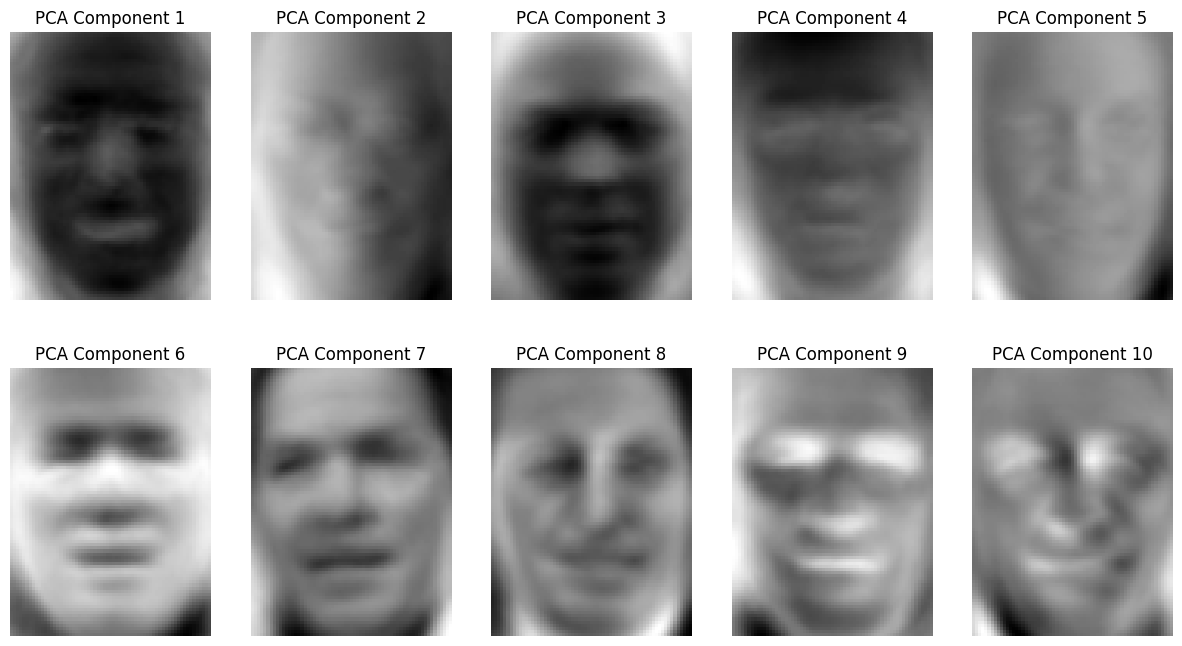

In [27]:
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pca.components_[i].reshape(87, 65), cmap='gray') # karena masih flatten
    plt.title(f"PCA Component {i+1}")
    plt.axis('off')

<h3> Reconstruct Image

In [29]:
X_train_inv = pca.inverse_transform(X_train_pca)

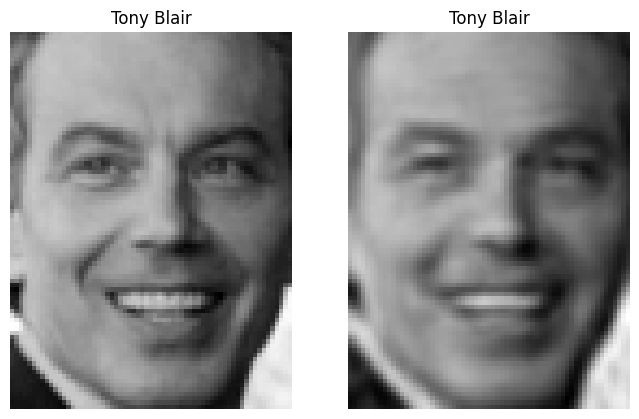

In [30]:
plt.figure(figsize=(8,5))

plt.subplot(121)
plt.imshow(X_train[2].reshape(87, 65), cmap='gray')
plt.title(y_train[2])
plt.axis('off');

plt.subplot(122)
plt.imshow(X_train_inv[2].reshape(87, 65), cmap='gray')
plt.title(y_train[2])
plt.axis('off');

<h3> Conventional Face Verification

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
soekarno1 = plt.imread("/content/data/sample_faces/soekarno1.png").reshape(1, -1)
soekarno2 = plt.imread("/content/data/sample_faces/soekarno2.png").reshape(1, -1)
hatta = plt.imread("/content/data/sample_faces/hatta.png").reshape(1, -1)

In [34]:
pca.transform(soekarno1).shape

(1, 250)

In [36]:
s1 = pca.transform(soekarno1)
s2 = pca.transform(soekarno2)
h1 = pca.transform(hatta)

In [37]:
cosine_similarity(s1, s2)

array([[0.99983897]])

In [38]:
cosine_similarity(s1, h1) # fail

array([[0.99978991]])

<h3 Find the most similar face with Ir.Soekarno

In [46]:
sim =cosine_similarity(s1, X_train_pca)

In [47]:
sim.argsort()

array([[1400, 1157,  936, ...,  792,   91, 1166]])

(-0.5, 64.5, 86.5, -0.5)

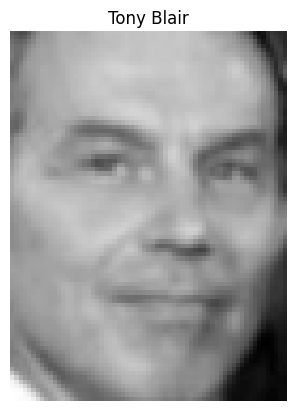

In [49]:
idx = 936
plt.imshow(X_train[idx].reshape(87, 65), cmap="gray")
plt.title(y_train[idx])
plt.axis('off')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


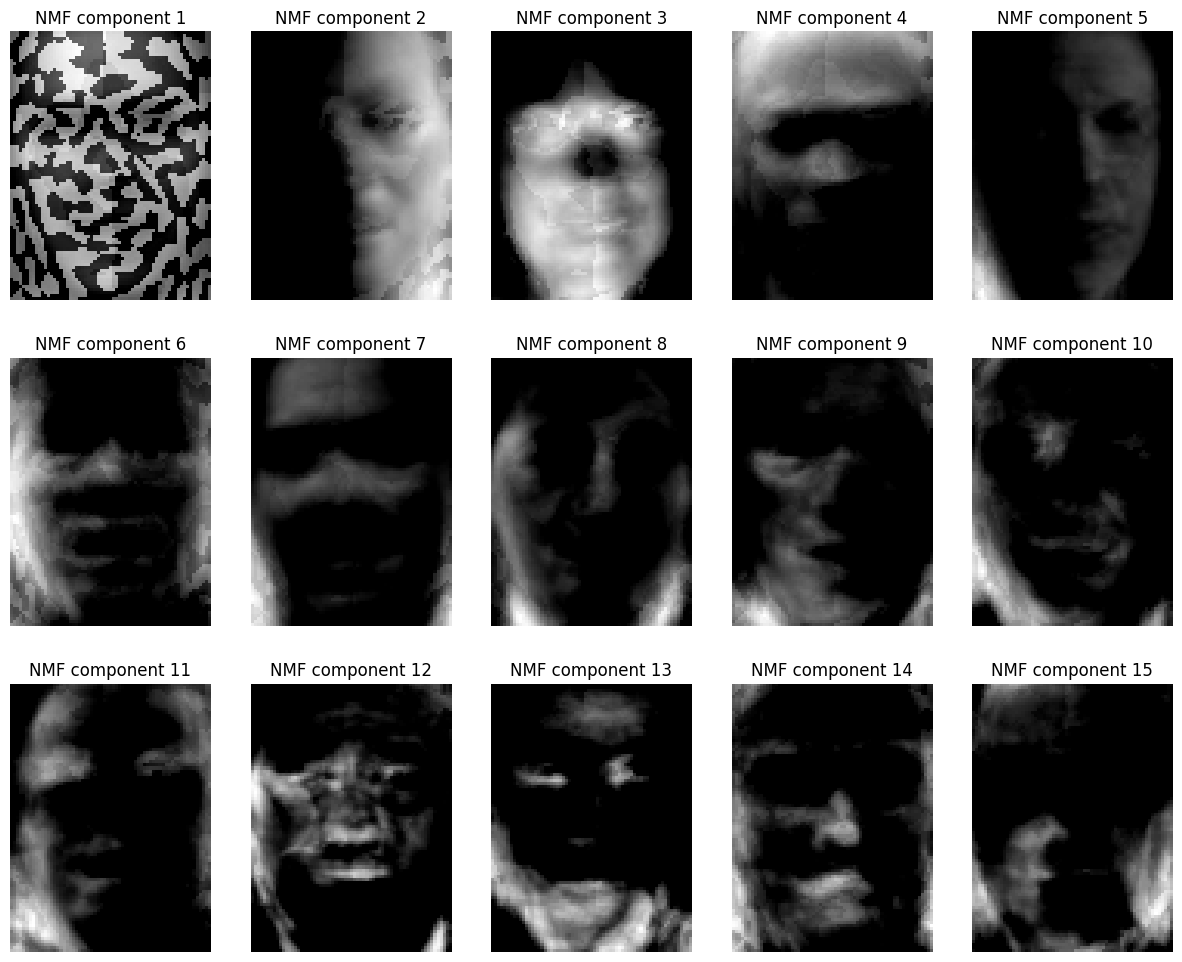

In [55]:
nmf = NMF(250)
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)

plt.figure(figsize=(15, 12))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(nmf.components_[i].reshape(87, 65), cmap='gray')
    plt.title(f"NMF component {i+1}")
    plt.axis('off')